<a href="https://colab.research.google.com/github/fansha1994/DS-Unit-4-Sprint-1-NLP/blob/main/module1-text-data/LS_DS18_411_Text_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

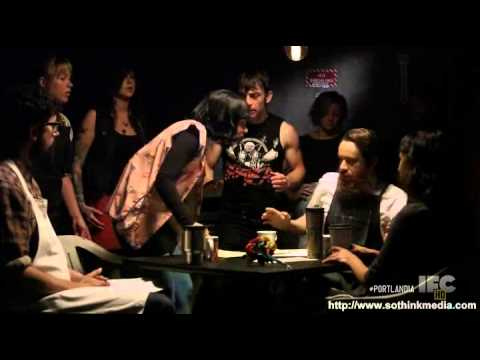

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/content'

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# Start here #
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
!pip install -r requirements.txt

--2020-10-01 04:20:52--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     137  --.-KB/s    in 0s      

2020-10-01 04:20:53 (4.89 MB/s) - ‘requirements.txt’ saved [137/137]

     |████████████████████████████████| 24.2MB 169kB/s 
     |████████████████████████████████| 1.6MB 38.6MB/s 
     |████████████████████████████████| 10.4MB 9.2MB/s 
     |████████████████████████████████| 7.1MB 44.7MB/s 
     |████████████████████████████████| 215kB 49.9MB/s 
     |████████████████████████████████| 2.2MB 36.2MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.wh

In [5]:
!python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4MB 1.0MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-cp36-none-any.whl size=98051305 sha256=e72720b641395b09d923032e87a97465ff6ea6e695302fe0304125458abd19ac
  Stored in directory: /tmp/pip-ephem-wheel-cache-56t6w2is/wheels/df/94/ad/f5cf59224cea6b5686ac4fd1ad19c8a07bc026e13c36502d81
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [3]:
print(shops.shape)
shops.head()

(7616, 3)


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [8]:
text1 = shops['star_rating'][0]
text1

' 5.0 star rating '

In [9]:
import re
text1 = float(re.sub('[^.0 0-9]','', text1))
text1

5.0

In [11]:
# make a new column, rating

shops['rating'] = [float(re.sub('[^.0 0-9]','', rating)) for rating in shops['star_rating']] 
shops.head()

,coffee_shop_name,full_review_text,star_rating,rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4.0


In [13]:
text2 = shops['full_review_text'][8]
text2

' 10/25/2016 1 check-in Ok, let\'s try this approach...  Pros: Music Seating Decor General ambiance Service  Cons: iPad ordering (I\'m a crotchety old man, kids) Limited coffee menu, or menu in general Relatively expensive Food is pretty but lackluster  I\'m still sitting here as I type this and I\'m less than overjoyed with the experience, sadly. The space and vibe are great but not quite familiar or intimate enough to beat out a place like Genuine Joe down the street. It seems like they bank on the vibe, and fall short the rest of the way. (This would be a great hangout for the artsy/design crowd having a collaborative meeting.)  The staff is great but the iPad ordering system limits your required interaction with them. They take pride in no wifi to increase interaction but then use iPads instead of people?  Seating is ample, if cramped in a surprisingly large space.  But the food, kids. So pretty, but again lackluster. I tried the Pop+art ($5) and the Nutella Waffle ($4.75) and they

In [14]:
text2 = re.sub("[^a-zA-Z.,!?']+"," ", text2)
text2

" check in Ok, let's try this approach... Pros Music Seating Decor General ambiance Service Cons iPad ordering I'm a crotchety old man, kids Limited coffee menu, or menu in general Relatively expensive Food is pretty but lackluster I'm still sitting here as I type this and I'm less than overjoyed with the experience, sadly. The space and vibe are great but not quite familiar or intimate enough to beat out a place like Genuine Joe down the street. It seems like they bank on the vibe, and fall short the rest of the way. This would be a great hangout for the artsy design crowd having a collaborative meeting. The staff is great but the iPad ordering system limits your required interaction with them. They take pride in no wifi to increase interaction but then use iPads instead of people? Seating is ample, if cramped in a surprisingly large space. But the food, kids. So pretty, but again lackluster. I tried the Pop art and the Nutella Waffle . and they both sit on their respective tiny awkwa

In [15]:
# making a new column clean_review_text
shops['clean_review_text'] = shops['full_review_text'].apply(lambda x: re.sub("[^a-zA-Z.,!?']+"," ", x))
shops.head()

,coffee_shop_name,full_review_text,star_rating,rating,clean_review_text
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5.0,check in Love love loved the atmosphere! Ever...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4.0,"Listed in Date Night Austin, Ambiance in Aust..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4.0,check in Listed in Brunch Spots I loved the e...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2.0,Very cool decor! Good drinks Nice seating How...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4.0,check in They are located within the Northcro...


In [17]:
# making a new column with labeling ratings 1-3 as bad and 4-5 as good
shops['rating_cat'] = shops['rating'].map({1.0:'Bad', 2.0:'Bad', 3.0:'Bad', 4.0:'Good', 5.0:'Good'})
shops.head()

,coffee_shop_name,full_review_text,star_rating,rating,clean_review_text,rating_cat
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5.0,check in Love love loved the atmosphere! Ever...,Good
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4.0,"Listed in Date Night Austin, Ambiance in Aust...",Good
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4.0,check in Listed in Brunch Spots I loved the e...,Good
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2.0,Very cool decor! Good drinks Nice seating How...,Bad
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4.0,check in They are located within the Northcro...,Good


In [20]:
shops.isnull().sum()

coffee_shop_name     0
full_review_text     0
star_rating          0
rating               0
clean_review_text    0
rating_cat           0
dtype: int64

In [21]:
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [22]:
# we will tokenize using spacy
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_md")

# Tokenizer
# tokenizer = Tokenizer(nlp.vocab)

In [24]:
# 
for doc in nlp.pipe(shops['clean_review_text'][:10]):
  print(doc)

 check in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes! I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? 
 Listed in Date Night Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram worthy!!! Definitely , so be prepared. This is gonna cost you a pretty penny Waffle dessert was just decent...nothing to rave about. But, will probably be back just to be somewhere unique and nice. 
 check in Listed in Brunch Spots I loved the eclectic and homey plush decor and who doesn't want to swing and drink their coffee? I would categorize this as a pr

In [26]:
tokens = []

for doc in nlp.pipe(shops['clean_review_text']):

  doc_tokens = []

  for token in doc:

    if (token.is_stop == False) & (token.is_punct ==False) & (token.pos_ != 'PRON'):
      doc_tokens.append(token.text.lower())

  tokens.append(doc_tokens)

# adding a new column
shops['tokens'] = tokens

In [27]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,rating,clean_review_text,rating_cat,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5.0,check in Love love loved the atmosphere! Ever...,Good,"[ , check, love, love, loved, atmosphere, corn..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4.0,"Listed in Date Night Austin, Ambiance in Aust...",Good,"[ , listed, date, night, austin, ambiance, aus..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4.0,check in Listed in Brunch Spots I loved the e...,Good,"[ , check, listed, brunch, spots, loved, eclec..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2.0,Very cool decor! Good drinks Nice seating How...,Bad,"[ , cool, decor, good, drinks, nice, seating, ..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4.0,check in They are located within the Northcro...,Good,"[ , check, located, northcross, mall, shopping..."


In [30]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer



In [31]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,rating,clean_review_text,rating_cat,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5.0,check in Love love loved the atmosphere! Ever...,Good,"[ , check, love, love, loved, atmosphere, corn..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4.0,"Listed in Date Night Austin, Ambiance in Aust...",Good,"[ , listed, date, night, austin, ambiance, aus..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4.0,check in Listed in Brunch Spots I loved the e...,Good,"[ , check, listed, brunch, spots, loved, eclec..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2.0,Very cool decor! Good drinks Nice seating How...,Bad,"[ , cool, decor, good, drinks, nice, seating, ..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4.0,check in They are located within the Northcro...,Good,"[ , check, located, northcross, mall, shopping..."


In [32]:
shops['rating'].value_counts(normalize=True)

5.0    0.496324
4.0    0.309874
3.0    0.096901
2.0    0.060399
1.0    0.036502
Name: rating, dtype: float64

In [33]:
# instructor analyze function
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [35]:
# Use the instructor Function to get review stats
wc = count(shops['tokens'])

In [36]:
wc.head(50)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
5,coffee,4924,10571,1.0,0.029362,0.029362,0.646534
0,,7616,7616,2.0,0.021154,0.050516,1.000000
89,place,3667,5447,3.0,0.015130,0.065646,0.481486
158,good,2797,4002,4.0,0.011116,0.076762,0.367253
78,great,2845,3939,5.0,0.010941,0.087703,0.373556
18,check,3129,3357,6.0,0.009324,0.097027,0.410846
154,like,2143,3127,7.0,0.008686,0.105713,0.281381
51,austin,1843,2346,8.0,0.006516,0.112229,0.241991
19,love,1502,1946,9.0,0.005405,0.117634,0.197216
495,time,1488,1907,10.0,0.005297,0.122931,0.195378


In [37]:
# lemmatize 

def get_lemmas(text):

  lemmas = []

  doc = nlp(text)

  for token in doc:
    if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
      lemmas.append(token.lemma_)
  
  return lemmas

In [38]:
shops['lemmas'] = shops['clean_review_text'].apply(get_lemmas)
shops.head()

,coffee_shop_name,full_review_text,star_rating,rating,clean_review_text,rating_cat,tokens,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5.0,check in Love love loved the atmosphere! Ever...,Good,"[ , check, love, love, loved, atmosphere, corn...","[ , check, Love, love, love, atmosphere, corne..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4.0,"Listed in Date Night Austin, Ambiance in Aust...",Good,"[ , listed, date, night, austin, ambiance, aus...","[ , list, Date, Night, Austin, ambiance, Austi..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4.0,check in Listed in Brunch Spots I loved the e...,Good,"[ , check, listed, brunch, spots, loved, eclec...","[ , check, list, Brunch, Spots, love, eclectic..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2.0,Very cool decor! Good drinks Nice seating How...,Bad,"[ , cool, decor, good, drinks, nice, seating, ...","[ , cool, decor, good, drink, nice, seating, o..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4.0,check in They are located within the Northcro...,Good,"[ , check, located, northcross, mall, shopping...","[ , check, locate, Northcross, mall, shopping,..."


In [40]:
# Use the instructor Function to get review stats
wc = count(shops['lemmas'])
wc.head(5)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
3,coffee,4840,10144,1.0,0.028176,0.028176,0.635504
0,,7616,7616,2.0,0.021154,0.049330,1.000000
87,place,3879,6034,3.0,0.016760,0.066090,0.509322
154,good,3554,5320,4.0,0.014777,0.080867,0.466649
76,great,2842,3922,5.0,0.010894,0.091761,0.373162


In [41]:
wc = wc.drop([3])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
0,,7616,7616,2.0,0.021154,0.049330,1.000000
87,place,3879,6034,3.0,0.016760,0.066090,0.509322
154,good,3554,5320,4.0,0.014777,0.080867,0.466649
76,great,2842,3922,5.0,0.010894,0.091761,0.373162
14,check,3175,3469,6.0,0.009636,0.101397,0.416886


In [42]:
wc = wc.drop([0])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
87,place,3879,6034,3.0,0.016760,0.066090,0.509322
154,good,3554,5320,4.0,0.014777,0.080867,0.466649
76,great,2842,3922,5.0,0.010894,0.091761,0.373162
14,check,3175,3469,6.0,0.009636,0.101397,0.416886
150,like,2275,3382,7.0,0.009394,0.110790,0.298713


In [43]:
# filter out good coffee shops
good_shops = shops.loc[shops['rating_cat'] == 'Good']
good_shops

,coffee_shop_name,full_review_text,star_rating,rating,clean_review_text,rating_cat,tokens,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5.0,check in Love love loved the atmosphere! Ever...,Good,"[ , check, love, love, loved, atmosphere, corn...","[ , check, Love, love, love, atmosphere, corne..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4.0,"Listed in Date Night Austin, Ambiance in Aust...",Good,"[ , listed, date, night, austin, ambiance, aus...","[ , list, Date, Night, Austin, ambiance, Austi..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4.0,check in Listed in Brunch Spots I loved the e...,Good,"[ , check, listed, brunch, spots, loved, eclec...","[ , check, list, Brunch, Spots, love, eclectic..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4.0,check in They are located within the Northcro...,Good,"[ , check, located, northcross, mall, shopping...","[ , check, locate, Northcross, mall, shopping,..."
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating,4.0,check in Very cute cafe! I think from the mom...,Good,"[ , check, cute, cafe, think, moment, stepped,...","[ , check, cute, cafe, think, moment, step, fi..."
...,...,...,...,...,...,...,...,...
7610,The Steeping Room,3/1/2016 Great food! I haven't had a meal I d...,5.0 star rating,5.0,Great food! I haven't had a meal I did not en...,Good,"[ , great, food, meal, enjoy, clean, great, pe...","[ , great, food, meal, enjoy, clean, great, pe..."
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating,4.0,I actually step into this restaurant by chanc...,Good,"[ , actually, step, restaurant, chance, favori...","[ , actually, step, restaurant, chance, favori..."
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0 star rating,5.0,"Ok, The Steeping Room IS awesome. How do they...",Good,"[ , ok, steeping, room, awesome, great, menu, ...","[ , ok, Steeping, Room, awesome, great, menu, ..."
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating,4.0,"Loved coming here for tea, and the atmosphere...",Good,"[ , loved, coming, tea, atmosphere, pretty, fr...","[ , love, come, tea, atmosphere, pretty, fresh..."


In [44]:
# filter out bad coffee shops
bad_shops = shops.loc[shops['rating_cat'] == 'Bad']
bad_shops

,coffee_shop_name,full_review_text,star_rating,rating,clean_review_text,rating_cat,tokens,lemmas
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2.0,Very cool decor! Good drinks Nice seating How...,Bad,"[ , cool, decor, good, drinks, nice, seating, ...","[ , cool, decor, good, drink, nice, seating, o..."
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0 star rating,3.0,"check in Ok, let's try this approach... Pros ...",Bad,"[ , check, ok, let, try, approach, pros, music...","[ , check, ok, let, try, approach, pro, music,..."
11,The Factory - Cafe With a Soul,"11/20/2016 The store has A+ decoration, but h...",3.0 star rating,3.0,"The store has A decoration, but honestly, the...",Bad,"[ , store, decoration, honestly, coffee, good,...","[ , store, decoration, honestly, coffee, good,..."
12,The Factory - Cafe With a Soul,11/17/2016 1 check-in Listed in 2016 - The Th...,3.0 star rating,3.0,check in Listed in The Third Time is a Charm!...,Bad,"[ , check, listed, time, charm, factory, decor...","[ , check, list, Time, Charm, factory, decor, ..."
25,The Factory - Cafe With a Soul,"12/2/2016 Okay, so after visiting my friends ...",1.0 star rating,1.0,"Okay, so after visiting my friends in LA and ...",Bad,"[ , okay, visiting, friends, la, trying, mint,...","[ , okay, visit, friend, LA, try, mint, mojito..."
...,...,...,...,...,...,...,...,...
7582,The Steeping Room,8/21/2014 I should probably give this spot 4 ...,3.0 star rating,3.0,"I should probably give this spot stars, but t...",Bad,"[ , probably, spot, stars, main, dish, underwh...","[ , probably, spot, star, main, dish, underwhe..."
7583,The Steeping Room,9/13/2015 It's a lovely little tea and pastry...,2.0 star rating,2.0,"It's a lovely little tea and pastry shop, but...",Bad,"[ , lovely, little, tea, pastry, shop, service...","[ , lovely, little, tea, pastry, shop, service..."
7590,The Steeping Room,1/15/2015 So today I tried this place. I have...,3.0 star rating,3.0,So today I tried this place. I have been in A...,Bad,"[ , today, tried, place, austin, september, li...","[ , today, try, place, Austin, September, list..."
7600,The Steeping Room,5/10/2015 Great service with unimaginative an...,2.0 star rating,2.0,Great service with unimaginative and uneventf...,Bad,"[ , great, service, unimaginative, uneventful,...","[ , great, service, unimaginative, uneventful,..."


In [45]:
good_wc = count(good_shops['lemmas']).drop([3])
good_wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
0,,6140,6140,2.0,0.021778,0.050289,1.000000
87,place,3126,4805,3.0,0.017043,0.067332,0.509121
188,good,2910,4325,4.0,0.015341,0.082673,0.473941
76,great,2495,3456,5.0,0.012258,0.094931,0.406352
14,check,2686,2942,6.0,0.010435,0.105367,0.437459


In [46]:
good_wc = count(good_shops['lemmas']).drop([0])
good_wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
3,coffee,3921,8038,1.0,0.028511,0.028511,0.638599
87,place,3126,4805,3.0,0.017043,0.067332,0.509121
188,good,2910,4325,4.0,0.015341,0.082673,0.473941
76,great,2495,3456,5.0,0.012258,0.094931,0.406352
14,check,2686,2942,6.0,0.010435,0.105367,0.437459


In [47]:
bad_wc = count(bad_shops['lemmas']).drop([2])
bad_wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
4,coffee,919,2106,1.0,0.026968,0.026968,0.622629
0,,1476,1476,2.0,0.018901,0.045869,1.000000
24,place,753,1229,3.0,0.015738,0.061607,0.510163
16,good,644,995,4.0,0.012741,0.074348,0.436314
10,like,596,946,5.0,0.012114,0.086462,0.403794


In [48]:
bad_wc = count(bad_shops['lemmas']).drop([0])
bad_wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
4,coffee,919,2106,1.0,0.026968,0.026968,0.622629
24,place,753,1229,3.0,0.015738,0.061607,0.510163
16,good,644,995,4.0,0.012741,0.074348,0.436314
10,like,596,946,5.0,0.012114,0.086462,0.403794
49,order,434,768,6.0,0.009835,0.096297,0.294038


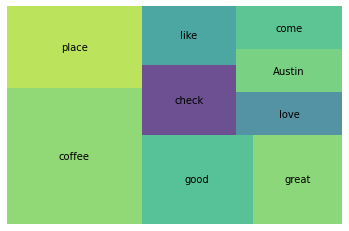

In [49]:
# squarify visual for good rated shops
good_wc_top10 = good_wc.loc[good_wc['rank'] <= 10]

squarify.plot(sizes=good_wc_top10['pct_total'], label=good_wc_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()

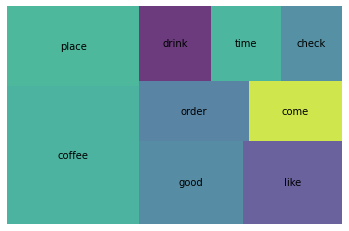

In [50]:
# squarify visual for good rated shops
bad_wc_top10 = bad_wc.loc[bad_wc['rank'] <= 10]

squarify.plot(sizes=bad_wc_top10['pct_total'], label=bad_wc_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [51]:
shops['clean_review_text'][240]

" check in Mozart's is in a great spot on Lake Austin! The view is amazing! It is a bit touristy here, which is ok sometimes. Other times it can feel a bit crowded here. The tea is good and the hot chocolate is awesome! It is a little expensive in my opinion, but they have options which is nice. During the holidays they do a laser light show ... for FREE which is so nice of them. Beware it draws a ton of people. Even though there is a huge crowd I felt like it was organized and done well, but I probably wouldn't come back because of the crowd. The outside deck offers lots of seating in addition to the indoor space. Mozart's a cool spot to check out if you ask me. "

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

